In [176]:
!pip install nltk
nltk.download('all')
nltk.download('stopwords')
nltk.download('punkt')
import nltk
import spacy
import string
import re
import keras
import numpy as np
import pandas as pd
from pandas import read_csv
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

In [177]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [178]:
dataset=read_csv("/content/drive/MyDrive/ moynul/Deprassion_Detection_final_data - Deprassion_Detection_final_data.csv",encoding="UTF-8")
dataset.head()

,Text,Class
0,Not everything is made of giggles and sunshine...,sad
1,Happiness and sadness are two sides of the sam...,sad
2,Nobody knows about the emotional breakdowns I ...,sad
3,Just because I can carry my troubles well does...,sad
4,Getting flashbacks suck when they???re memorie...,sad


In [179]:
dataset=dataset.drop_duplicates()
dataset.shape

(9991, 2)

In [180]:
len(dataset.Class.value_counts())

4

In [181]:
dataset.Class.unique()

array(['sad', 'happy', 'angry', 'anxiety'], dtype=object)

In [182]:
dataset.isnull().sum()

Text     0
Class    0
dtype: int64

In [183]:
print("Total Reviews:",len(dataset),
      "\nTotal happy Reviews:",len(dataset[dataset.Class =='happy']),
      "\nTotal sad Reviews:",len(dataset[dataset.Class=='sad']),
      "\nTotal angry Reviews:",len(dataset[dataset.Class =='angry']),
      "\nTotal anxiety Reviews:",len(dataset[dataset.Class =='anxiety']))

Total Reviews: 9991 
Total happy Reviews: 2197 
Total sad Reviews: 2307 
Total angry Reviews: 2850 
Total anxiety Reviews: 2637


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


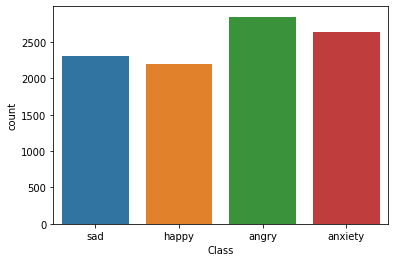

In [184]:
sns.countplot(dataset['Class'])

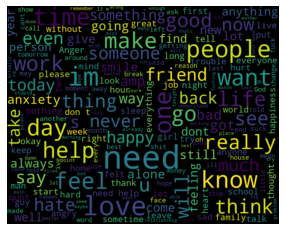

In [185]:
from wordcloud import WordCloud 
# Plot the Word Cloud
allWords = ' '.join([comnt for comnt in dataset['Text']])
wordCloud = WordCloud(width =1000, height =800, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

**Preorocesss Section**

In [186]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
stemmer=nltk.SnowballStemmer('english')
STOPWORDS=stopwords.words('english')
PUNCT_TO_REMOVE = string.punctuation

In [187]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
dataset['Text'] = dataset['Text'].apply(remove_emoji)

In [188]:
def clean_text(text):
    
    text = word_tokenize(text)                                                     # tokenize
    text = str(text).lower()                                                       # converting to lower case
    text = re.sub(r'@\S+|http\S+|www.\S+|\n','',text)                              # removing mentions and links
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)                                    # removing special characters 
    text = [stemmer.stem(word) for word in text.split(' ')]                        # stem words 
    text = " ".join([word for word in text if word not in STOPWORDS])              # remove stopwords
    text = text.strip()                                                            # remove extra spaces from start and end of string
    text = text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))                  # remove puncuation
     
    return text

dataset['clean_data'] = dataset['Text'].apply(clean_text)


In [189]:
dataset.head(10)

,Text,Class,clean_data
0,Not everything is made of giggles and sunshine...,sad,everyth made giggl sunshin everi frown raind...
1,Happiness and sadness are two sides of the sam...,sad,happi sad two side coin whi realli uncommo...
2,Nobody knows about the emotional breakdowns I ...,sad,nobodi know emot breakdown experi alon eve...
3,Just because I can carry my troubles well does...,sad,becaus carri troubl well mean feel crush...
4,Getting flashbacks suck when they???re memorie...,sad,get flashback suck memori alway want forget
5,"Pain is hard to avoid. Actually, just the act ...",sad,pain hard avoid actual act tri avoid alreadi...
6,Remember that pessimism isn???t really bad at ...,sad,rememb pessim realli bad peopl disappoint ...
7,"####Whenever happiness visits me, bad things h...",sad,whenev happi visit bad thing happen right ...
8,Wouldn???t it be terrific if we could turn bac...,sad,terrif could turn back time could wipe sad mo...
9,"All human souls are connected, which explains ...",sad,human soul connect explain whi hurt much detach


In [190]:
dataset=dataset[['clean_data','Class']]
dataset.head(5)

,clean_data,Class
0,everyth made giggl sunshin everi frown raind...,sad
1,happi sad two side coin whi realli uncommo...,sad
2,nobodi know emot breakdown experi alon eve...,sad
3,becaus carri troubl well mean feel crush...,sad
4,get flashback suck memori alway want forget,sad


**Preprocess labbelling class to nuemeric**

In [191]:
from sklearn.preprocessing import LabelEncoder
dataset["Class"] = LabelEncoder().fit_transform(dataset["Class"])
dataset["Class"] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        3
1        3
2        3
3        3
4        3
        ..
10418    1
10419    1
10420    1
10421    1
10423    1
Name: Class, Length: 9991, dtype: int64

**Applying only CountVectorizer**

In [192]:
x= dataset.clean_data.values[:10424]

y= dataset.Class.values[:10424]

In [193]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a Vectorizer Object
vectorizer = CountVectorizer()
 
vectorizer.fit(x)
 
# Printing the identified Unique words along with their indices
# print("Vocabulary: ", vectorizer.vocabulary_)
 
# Encode the Document
vector = vectorizer.transform(x)
 
# Summarizing the Encoded Texts
# print("Encoded Document is:")
print(vector.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector, y, test_size=0.2, shuffle=True, random_state=100)

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [196]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score( X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.6888444222111055

In [197]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score( X_test,y_test)

0.6008004002001001

In [198]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score( X_test,y_test)

0.662831415707854

In [199]:
model = MultinomialNB()
model.fit(X_train, y_train)
model.score( X_test,y_test)

0.6193096548274137

In [200]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
model.score( X_test,y_test)

0.4502251125562781

In [201]:
model =SVC()
model.fit(X_train, y_train)
model.score( X_test,y_test)

0.6898449224612306

In [202]:
model =SGDClassifier()
model.fit(X_train, y_train)
model.score( X_test,y_test)


0.6878439219609805

 **Applying CV and tf-idf features**

In [203]:
from sklearn.model_selection import train_test_split

X = dataset.clean_data
y = dataset.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [204]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((6993,), (2998,), (6993,), (2998,))

In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

lr = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression()),
              ])

lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred1,y_test)))

Accuracy: 71.15%


In [206]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred1))


Classification Report

              precision    recall  f1-score   support

           0       0.65      0.74      0.69       855
           1       0.87      0.91      0.89       785
           2       0.68      0.58      0.63       658
           3       0.63      0.59      0.61       700

    accuracy                           0.71      2998
   macro avg       0.71      0.70      0.70      2998
weighted avg       0.71      0.71      0.71      2998



In [207]:
from sklearn.tree import DecisionTreeClassifier


decisiontreeclassifier = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', DecisionTreeClassifier()),
              ])
decisiontreeclassifier.fit(X_train, y_train)

y_pred = decisiontreeclassifier.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred,y_test)))


Accuracy: 64.81%


In [208]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))


Classification Report

              precision    recall  f1-score   support

           0       0.62      0.59      0.60       855
           1       0.85      0.86      0.86       785
           2       0.55      0.56      0.55       658
           3       0.55      0.56      0.56       700

    accuracy                           0.65      2998
   macro avg       0.64      0.64      0.64      2998
weighted avg       0.65      0.65      0.65      2998



In [209]:
from sklearn.ensemble import RandomForestClassifier

randomforestclassifier = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier()),
              ])
randomforestclassifier.fit(X_train, y_train)

y_pred = randomforestclassifier.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred,y_test)))

Accuracy: 70.85%


In [210]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))


Classification Report

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       855
           1       0.87      0.93      0.90       785
           2       0.66      0.57      0.61       658
           3       0.60      0.62      0.61       700

    accuracy                           0.71      2998
   macro avg       0.70      0.70      0.70      2998
weighted avg       0.70      0.71      0.71      2998



In [211]:
from sklearn.naive_bayes import MultinomialNB


naivebayes = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
naivebayes.fit(X_train, y_train)

y_pred = naivebayes.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred,y_test)))


Accuracy: 64.18%


In [212]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))


Classification Report

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       855
           1       0.57      0.97      0.72       785
           2       0.76      0.45      0.57       658
           3       0.71      0.43      0.54       700

    accuracy                           0.64      2998
   macro avg       0.68      0.63      0.62      2998
weighted avg       0.67      0.64      0.63      2998



In [213]:
from sklearn.neighbors import KNeighborsClassifier

KNeighborsClassifier = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', KNeighborsClassifier()),
              ])
KNeighborsClassifier.fit(X_train, y_train)

y_pred = KNeighborsClassifier.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred,y_test)))

Accuracy: 41.06%


In [214]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))


Classification Report

              precision    recall  f1-score   support

           0       0.62      0.25      0.36       855
           1       0.81      0.30      0.44       785
           2       0.53      0.28      0.37       658
           3       0.30      0.85      0.44       700

    accuracy                           0.41      2998
   macro avg       0.56      0.42      0.40      2998
weighted avg       0.58      0.41      0.40      2998



In [215]:
from sklearn.svm import SVC

SVC = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SVC()),
              ])
SVC.fit(X_train, y_train)

y_pred = SVC.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred,y_test)))

Accuracy: 71.61%


In [216]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))


Classification Report

              precision    recall  f1-score   support

           0       0.62      0.80      0.70       855
           1       0.89      0.89      0.89       785
           2       0.70      0.56      0.62       658
           3       0.67      0.57      0.61       700

    accuracy                           0.72      2998
   macro avg       0.72      0.70      0.71      2998
weighted avg       0.72      0.72      0.71      2998

